In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

In [2]:
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'C:\\Users\\Utente\\Desktop\\Università\\Pisa\\Primo semestre\\Data Mining 1\\Progetto': ['.ipynb_checkpoints', 'Classification Lia.ipynb', 'DataMining_2.pdf', 'DataUnderstanding_Clustering.ipynb', 'hands_on_dm1_classification.ipynb', 'hands_on_dm1_pattern_mining.ipynb', 'immagini report', 'NuovoDataset.csv', 'Pattern Mining Lia.ipynb', "Prima parte Project_D'Orsi_Di Virgilio_Lelli_Trapanese.pdf", 'Prova classification con tutte le features.ipynb', 'README_asa_notebook.ipynb', 'README_seismic.txt', 'Report.pdf', 'seismic-bumps.csv', 'SeismicBumps_PatternMining_Lia.ipynb', 'Seismic_Bumps', 'seismic_bumps.zip', 'spiegazioneProgettoDataMining.txt']


In [3]:
df = pd.read_csv('NuovoDataset.csv')

In [4]:
df

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,b,a,W,81410,785,432,151,b,0,0,0,0,0,0,0
2559,b,a,W,42110,555,213,118,a,0,0,0,0,0,0,0
2560,b,a,W,26960,540,101,112,a,0,0,0,0,0,0,0
2561,a,a,W,16130,322,2,2,a,0,0,0,0,0,0,0


In [5]:
###### Lecture Pipeline ######
# you can/have to modify the order for your project,
# e.g. hyperparameter tuning before evaluating a decision tree

# Hold-out
from sklearn.model_selection import train_test_split

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Optional: KNN
from sklearn.neighbors import KNeighborsClassifier

##### Decision Tree Visualization ###
from sklearn import tree # export_graphviz() method
import pydotplus # viz stuff
from IPython.display import Image # viz stuff
####################################

######## Evaluation #######
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Optional: baseline comparison
from sklearn.dummy import DummyClassifier
###########################

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# cross-validation
from sklearn.model_selection import cross_val_score

# Prepare dataset for classification task

In [6]:
drop= ["seismic", "shift", "seismoacoustic", "hazard", "gdpuls", "nbumps2", "nbumps3", "nbumps4", "nbumps5" ] 

In [7]:
df= df.drop(drop, axis=1)

In [8]:
df.shape

(2563, 6)

In [9]:
df.shape

(2563, 6)

In [10]:
df

,genergy,gpuls,gdenergy,nbumps,energy,class
0,15180,48,-72,0,0,0
1,14720,33,-70,1,2000,0
2,8050,30,-81,0,0,0
3,28820,171,-23,1,3000,0
4,12640,57,-63,0,0,0
...,...,...,...,...,...,...
2558,81410,785,432,0,0,0
2559,42110,555,213,0,0,0
2560,26960,540,101,0,0,0
2561,16130,322,2,0,0,0


In [11]:
# Holdout Method is the simplest sort of method to evaluate a classifier. 
# In this method, the data set (a collection of data items or examples) is separated into two sets, called the Training set and Test set.
# A classifier performs function of assigning data items in a given collection to a target category or class.

#split dataset in features and target variable
attributes = [col for col in df.columns if col != 'class']
X = df[attributes].values
y = df['class']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [12]:
len(df), X_train.shape[0], X_test.shape[0]

(2563, 1794, 769)

In [13]:
len(df), y_train.shape[0], y_test.shape[0]

(2563, 1794, 769)

In [14]:
df.shape, X_train.shape, X_test.shape

((2563, 6), (1794, 5), (769, 5))

In [15]:
from sklearn.model_selection import GridSearchCV

params = {'criterion':['gini', 'entropy'], #tutte le chiavi del dizionario vanno nel decision 
          'max_depth':[x for x in range(4,15)],
          'min_samples_split':[x for x in range(2,30)],
           'min_samples_leaf':[x for x in range(2,30)],
           'class_weight':['balanced']}    # default value set to balanced since we are dealing with imbalanced classes

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

grid_search = GridSearchCV(clf, params, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_) #parametri migliori da usare nel decision tree

Fitting 5 folds for each of 17248 candidates, totalling 86240 fits
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [16]:
clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth=12 ,
                             min_samples_leaf=2,
                             min_samples_split=3,
                             class_weight= 'balanced'
                            )
# Train Decision Tree Classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, min_samples_leaf=2, min_samples_split=3)

Training - classification report

In [17]:
y_pred_train = clf.predict(X_train) # valuto performance sul training
print(classification_report(y_train,y_pred_train))
print('accuracy:', accuracy_score(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1675
           1       0.37      0.84      0.51       119

    accuracy                           0.89      1794
   macro avg       0.68      0.87      0.73      1794
weighted avg       0.95      0.89      0.91      1794

accuracy: 0.8946488294314381


Test - classification report

In [18]:
from sklearn.metrics import accuracy_score

#y_pred sono le label redette dal decision tree
#Predict the response for test dataset
y_pred = clf.predict(X_test) #confronta i valori reali con i valori del test set 
print(classification_report(y_test,y_pred))
print('accuracy:', accuracy_score(y_test, y_pred))

#l'accuracy non è importante perchè il dataset è sbilanciato (qunte volte hai azzecatto la label)

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       718
           1       0.18      0.41      0.25        51

    accuracy                           0.84       769
   macro avg       0.57      0.64      0.58       769
weighted avg       0.90      0.84      0.87       769

accuracy: 0.8400520156046815


In [19]:
clf.feature_importances_

array([0.14863665, 0.38480275, 0.15027594, 0.21726658, 0.09901807])

In [20]:
imp_dict = {attr: clf.feature_importances_[i] for i, attr in enumerate(attributes)}
imp_dict

{'genergy': 0.1486366533255104,
 'gpuls': 0.3848027529272176,
 'gdenergy': 0.15027593919511625,
 'nbumps': 0.2172665826743193,
 'energy': 0.09901807187783634}

In [21]:
{k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1], reverse=True)}

{'gpuls': 0.3848027529272176,
 'nbumps': 0.2172665826743193,
 'gdenergy': 0.15027593919511625,
 'genergy': 0.1486366533255104,
 'energy': 0.09901807187783634}

In [22]:
clf.classes_

array([0, 1], dtype=int64)

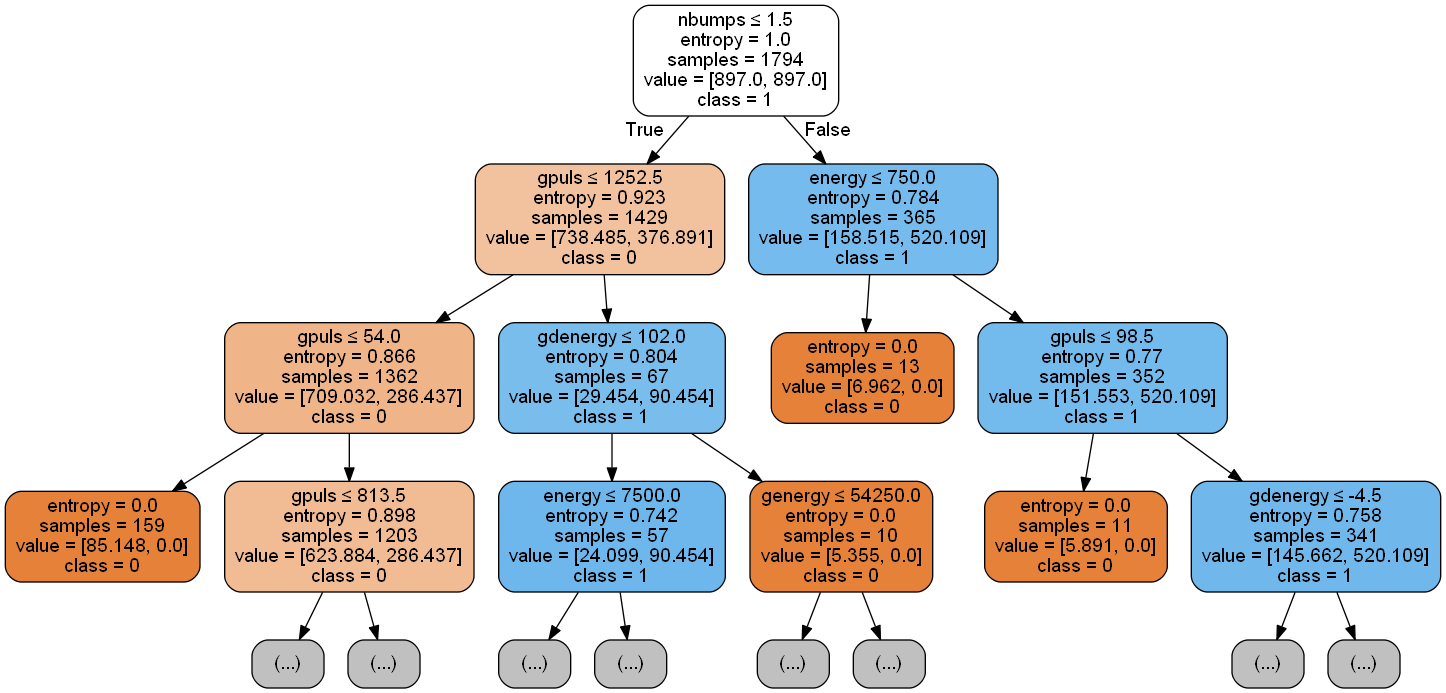

In [23]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=attributes,
                                class_names=[str(v) for v in clf.classes_],
                                filled=True, rounded=True,
                                special_characters=True,
                                max_depth=3)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

[[625  93]
 [ 30  21]]


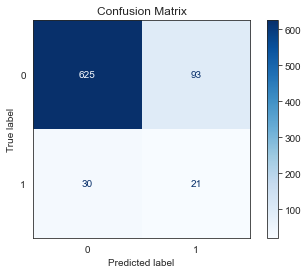

In [24]:
# confuseion
from sklearn.metrics import plot_confusion_matrix

sns.set_style('white')
disp = plot_confusion_matrix(clf,X_test,y_test,
                            cmap = plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
print(disp.confusion_matrix)
plt.show()

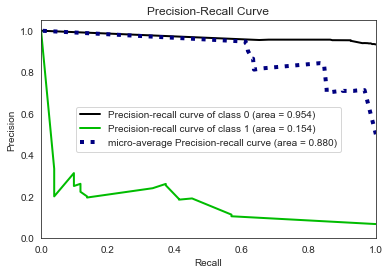

In [25]:
from scikitplot.metrics import plot_roc, plot_precision_recall
y_score = clf.predict_proba(X_test)
# precisio-recall curve
plot_precision_recall(y_test, y_score)
plt.show()

In [26]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_score = clf.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, y_score[:,1])

roc_auc = auc(fpr, tpr)
print(roc_auc)

0.6568354361243103


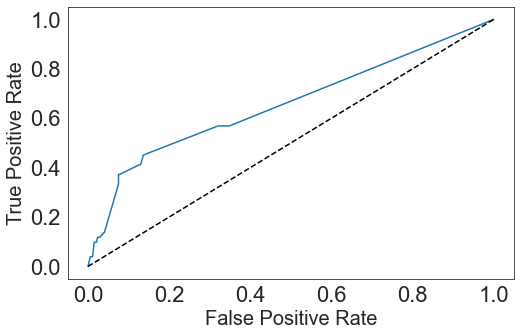

In [27]:

plt.figure(figsize=(8,5))

plt.plot(fpr, tpr)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

## Qual'è la peformance del modello se togliamo il paremetro class_weight?

In [28]:
clf_prova = DecisionTreeClassifier(criterion='entropy',
                             max_depth=14 ,
                             min_samples_split=3,
                             min_samples_leaf=2,
                            )
# Train Decision Tree Classifer
clf_prova.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=2,
                       min_samples_split=3)

In [29]:
# training - calssification report
y_pred_train_prova = clf_prova.predict(X_train) # valuto performance sultraining
print(classification_report(y_train,y_pred_train_prova))
print('accuracy:', accuracy_score(y_train, y_pred_train_prova))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1675
           1       0.87      0.66      0.75       119

    accuracy                           0.97      1794
   macro avg       0.92      0.82      0.87      1794
weighted avg       0.97      0.97      0.97      1794

accuracy: 0.9704570791527313


In [30]:
# test - calssification report
y_pred_test_prova = clf_prova.predict(X_test) # valuto performance sultraining
print(classification_report(y_test,y_pred_test_prova))
print('accuracy:', accuracy_score(y_test, y_pred_test_prova))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       718
           1       0.12      0.10      0.11        51

    accuracy                           0.89       769
   macro avg       0.53      0.52      0.53       769
weighted avg       0.88      0.89      0.89       769

accuracy: 0.8946684005201561


# Dummy model

In [31]:
'''dummy_clf = DummyClassifier(strategy='uniform')
dummy_clf.fit(X_test, y_test)

y_pred_dummy = dummy_clf.predict(X_test)
'''

"dummy_clf = DummyClassifier(strategy='uniform')\ndummy_clf.fit(X_test, y_test)\n\ny_pred_dummy = dummy_clf.predict(X_test)\n"

In [32]:
# confusion
'''
from sklearn.metrics import plot_confusion_matrix

sns.set_style('white')
disp = plot_confusion_matrix(dummy_clf,X_test,y_test,
                            cmap = plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
print(disp.confusion_matrix)
plt.show()
'''

"\nfrom sklearn.metrics import plot_confusion_matrix\n\nsns.set_style('white')\ndisp = plot_confusion_matrix(dummy_clf,X_test,y_test,\n                            cmap = plt.cm.Blues)\ndisp.ax_.set_title('Confusion Matrix')\nprint(disp.confusion_matrix)\nplt.show()\n"

# Imbalanced learning --> Undersampling

In [33]:
under_sample = RandomUnderSampler(random_state=42) 
# Store under-sampled data 
X_under, y_under = under_sample.fit_resample(X_train,y_train)   # for decision tree - because it doesn't need normalization 


#tolgo random i record dalla classe maggioritaria per bilanciare il training set 

In [34]:
print('Legend:') 
y_under.value_counts()

Legend:


1    119
0    119
Name: class, dtype: int64

In [35]:
params = {'criterion':['gini', 'entropy'], #tutte le chiavi del dizionario vanno nel decision 
          'max_depth':[x for x in range(4,15)],
          'min_samples_split':[x for x in range(2,30)],
           'min_samples_leaf':[x for x in range(2,30)],
        }    # default value set to balanced since we are dealing with imbalanced classes

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

grid_search = GridSearchCV(clf, params, n_jobs=-1, verbose=1)
grid_search.fit(X_under, y_under)
print(grid_search.best_params_) #parametri migliori da usare nel decision tree

Fitting 5 folds for each of 17248 candidates, totalling 86240 fits
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 20}


In [36]:
clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth=4 ,
                             min_samples_split=12,
                             min_samples_leaf=4,
                            )
# Train Decision Tree Classifer
clf.fit(X_under, y_under)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4,
                       min_samples_split=12)

In [37]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test) #confronta i valori reali con i valori del test set 
print(classification_report(y_test,y_pred))
print('accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84       718
           1       0.16      0.73      0.27        51

    accuracy                           0.73       769
   macro avg       0.57      0.73      0.55       769
weighted avg       0.92      0.73      0.80       769

accuracy: 0.7347204161248374


[[528 190]
 [ 14  37]]


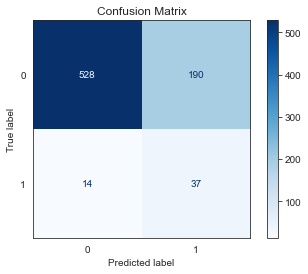

In [38]:
# confuseion
from sklearn.metrics import plot_confusion_matrix

sns.set_style('white')
disp = plot_confusion_matrix(clf,X_test,y_test,
                            cmap = plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
print(disp.confusion_matrix)
plt.show()

In [39]:
y_score = clf.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, y_score[:,1])

roc_auc = auc(fpr, tpr)
print(roc_auc)

0.7399366431809492


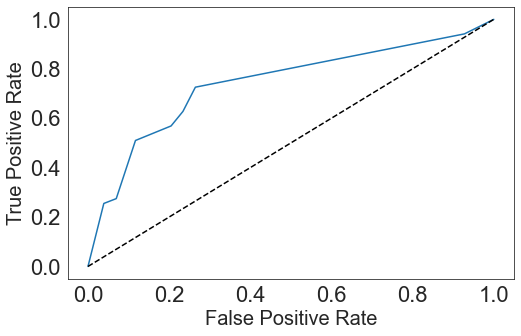

In [40]:
plt.figure(figsize=(8,5))

plt.plot(fpr, tpr)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

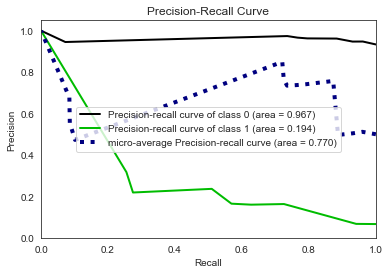

In [41]:
y_score = clf.predict_proba(X_test)
# precisio-recall curve
plot_precision_recall(y_test, y_score)
plt.show()

# Oversampling

In [42]:
over_sample = RandomOverSampler(sampling_strategy='minority') 
X_over, y_over = over_sample.fit_resample(X_train, y_train)

In [43]:
print('Legend:') 
y_over.value_counts()

Legend:


1    1675
0    1675
Name: class, dtype: int64

In [44]:
params = {'criterion':['gini', 'entropy'], #tutte le chiavi del dizionario vanno nel decision 
          'max_depth':[x for x in range(4,15)],
          'min_samples_split':[x for x in range(2,30)],
           'min_samples_leaf':[x for x in range(2,30)],
           'class_weight':['balanced'
                          ]
        }    # default value set to balanced since we are dealing with imbalanced classes

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

grid_search = GridSearchCV(clf, params, n_jobs=-1, verbose=1)
grid_search.fit(X_over, y_over)
print(grid_search.best_params_) #parametri migliori da usare nel decision tree

Fitting 5 folds for each of 17248 candidates, totalling 86240 fits
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [45]:
clf = DecisionTreeClassifier(criterion='gini',
                             max_depth=14 ,
                             min_samples_split=9,
                             min_samples_leaf=2,
                             class_weight='balanced'
                            )
# Train Decision Tree Classifer
clf.fit(X_over, y_over)

DecisionTreeClassifier(class_weight='balanced', max_depth=14,
                       min_samples_leaf=2, min_samples_split=9)

In [46]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test) #confronta i valori reali con i valori del test set 
print(classification_report(y_test,y_pred))
print('accuracy:', accuracy_score(y_test, y_pred))


#precision: ho 100 record (fa un'analisi sulla predizione)
#il decision tree ha detto che ne ha 70 di classe 1 --> ma la verità è che ne ha 10 di classe 1
#il decision tree ha detto che ne ha 30 di classe 0 ---> ma ne ha 20 di classe 0, 10 classe 1
#precision classe 1    10 azzeccati/70 =  0,14 bassa perche ne hai acchiappati 10 su 70


#recall classe 1 al numeratore quanti ne hai azzeccati (tra tutti) 20/ quanti record hanno quella classe ( mi dice quanti record rispetto alla classe ha indovinato) 

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       718
           1       0.15      0.31      0.20        51

    accuracy                           0.83       769
   macro avg       0.55      0.59      0.55       769
weighted avg       0.89      0.83      0.86       769

accuracy: 0.8335500650195059


[[625  93]
 [ 35  16]]


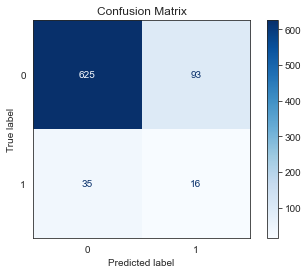

In [47]:
# confusion
from sklearn.metrics import plot_confusion_matrix

sns.set_style('white')
disp = plot_confusion_matrix(clf,X_test,y_test,
                            cmap = plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
print(disp.confusion_matrix)
plt.show()

# KNN


Normalize the data 

In [48]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [49]:
X_test_norm

array([[-0.33210604, -0.32971576,  0.05405405,  0.        ,  0.        ],
       [-0.03387334,  0.21395349,  3.08108108,  1.        ,  0.15384615],
       [ 0.35542464,  0.52196382,  0.77027027,  0.        ,  0.        ],
       ...,
       [-0.31639666,  0.0630491 ,  0.85135135,  0.        ,  0.        ],
       [-0.06872852, -0.25322997, -0.2972973 ,  3.        , 15.61538462],
       [ 0.23858616, -0.16640827,  0.66216216,  0.        ,  0.        ]])

GridSearch

In [50]:
from sklearn.neighbors import KNeighborsClassifier 

grid_params = {'n_neighbors': [x for x in range(3,20)],
              'weights': ['uniform','distance'],
              'metric':['euclidean','manhattan','minkowski']}

grid_search= GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1, cv=5, n_jobs=-1,scoring='recall' )
gs_results=grid_search.fit(X_train_norm,y_train)
gs_results.cv_results_.keys()

print(gs_results.best_score_,gs_results.best_params_)

Fitting 5 folds for each of 102 candidates, totalling 510 fits
0.07572463768115942 {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [51]:
knn = KNeighborsClassifier(metric='euclidean',n_neighbors=3, weights = 'distance')
knn.fit(X_train_norm,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [52]:
y_pred_knn = knn.predict(X_test_norm)

In [53]:
print(classification_report(y_test,y_pred_knn))
print('Accuracy test set', accuracy_score(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       718
           1       0.26      0.12      0.16        51

    accuracy                           0.92       769
   macro avg       0.60      0.55      0.56       769
weighted avg       0.89      0.92      0.90       769

Accuracy test set 0.9193758127438232


[[701  17]
 [ 45   6]]


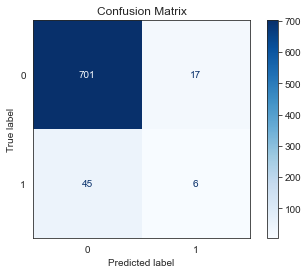

In [54]:
# confuseion
from sklearn.metrics import plot_confusion_matrix
sns.set_style('white')
disp = plot_confusion_matrix(knn,X_test_norm,y_test,
                            cmap = plt.cm.Blues)

disp.ax_.set_title('Confusion Matrix')
print(disp.confusion_matrix)
plt.show()

In [55]:
y_score_knn = knn.predict_proba(X_test_norm)
fpr, tpr, th = roc_curve(y_test, y_score_knn[:,1])

roc_auc = auc(fpr, tpr)
print(roc_auc)

0.5910071549511169


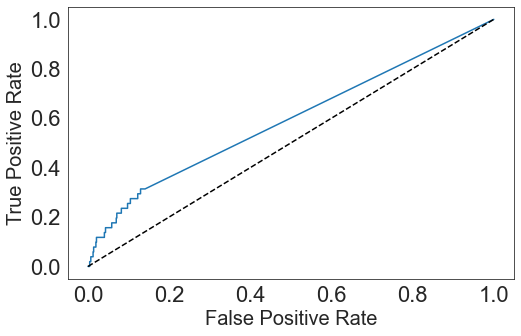

In [56]:
plt.figure(figsize=(8,5))

plt.plot(fpr, tpr)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

# Oversampling KNN

In [57]:
over_sample_knn = RandomOverSampler(sampling_strategy='minority') 
X_over_knn, y_over_knn = over_sample_knn.fit_resample(X_train_norm, y_train)

In [58]:
print('Legend:') 
y_over_knn.value_counts()

Legend:


1    1675
0    1675
Name: class, dtype: int64

In [59]:
grid_params_over = {'n_neighbors': [x for x in range(3,20)],
              'weights': ['uniform','distance'],
              'metric':['euclidean','manhattan','minkowski']}

grid_search= GridSearchCV(KNeighborsClassifier(), grid_params_over, verbose=1, cv=5, n_jobs=-1)
gs_results=grid_search.fit(X_over_knn,y_over_knn)
gs_results.cv_results_.keys()

print(gs_results.best_score_,gs_results.best_params_)

Fitting 5 folds for each of 102 candidates, totalling 510 fits
0.9304477611940299 {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [60]:
knn_over = KNeighborsClassifier(metric='euclidean',n_neighbors=3, weights = 'distance')
knn.fit(X_over_knn,y_over_knn)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [61]:
y_pred_knn_over = knn.predict(X_test_norm)

In [62]:
print(classification_report(y_test,y_pred_knn_over))
print('Accuracy test set', accuracy_score(y_test, y_pred_knn_over))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       718
           1       0.15      0.24      0.18        51

    accuracy                           0.86       769
   macro avg       0.55      0.57      0.55       769
weighted avg       0.89      0.86      0.88       769

Accuracy test set 0.8621586475942783


[[651  67]
 [ 39  12]]


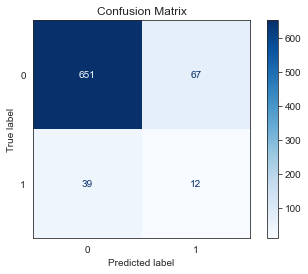

In [63]:
# confuseion
from sklearn.metrics import plot_confusion_matrix
sns.set_style('white')
disp = plot_confusion_matrix(knn,X_test_norm,y_test,
                            cmap = plt.cm.Blues)

disp.ax_.set_title('Confusion Matrix')
print(disp.confusion_matrix)
plt.show()

In [64]:
y_score_knnover = knn.predict_proba(X_test_norm)
fpr, tpr, th = roc_curve(y_test, y_score_knnover[:,1])

roc_auc = auc(fpr, tpr)
print(roc_auc)

0.5892457261456114


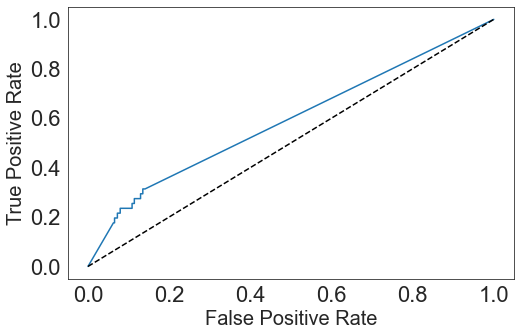

In [65]:
plt.figure(figsize=(8,5))

plt.plot(fpr, tpr)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

# Undersampling knn

In [66]:
under_sample_knn = RandomUnderSampler(random_state=42) 
# Store under-sampled data 
X_under_knn, y_under_knn = under_sample.fit_resample(X_train_norm,y_train)   # for decision tree - because it doesn't need normalization 


In [67]:
from sklearn.neighbors import KNeighborsClassifier 

grid_params = {'n_neighbors': [x for x in range(3,20)],
              'weights': ['uniform','distance'],
              'metric':['euclidean','manhattan','minkowski']}

grid_search= GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1, cv=5, n_jobs=-1)
gs_results=grid_search.fit(X_under_knn, y_under_knn)
gs_results.cv_results_.keys()

print(gs_results.best_score_,gs_results.best_params_)

Fitting 5 folds for each of 102 candidates, totalling 510 fits
0.6757978723404255 {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [68]:
knn_under = KNeighborsClassifier(metric='manhattan',n_neighbors=9, weights = 'distance')
knn_under.fit(X_under_knn, y_under_knn)

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [69]:
y_pred_under_knn = knn_under.predict(X_test_norm) #confronta i valori reali con i valori del test set 
print(classification_report(y_test,y_pred_under_knn))
print('accuracy:', accuracy_score(y_test, y_pred_under_knn))

              precision    recall  f1-score   support

           0       0.97      0.69      0.81       718
           1       0.13      0.67      0.22        51

    accuracy                           0.69       769
   macro avg       0.55      0.68      0.51       769
weighted avg       0.91      0.69      0.77       769

accuracy: 0.6892067620286085


[[496 222]
 [ 17  34]]


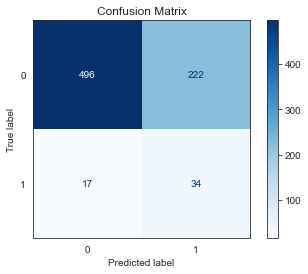

In [70]:
# confuseion
from sklearn.metrics import plot_confusion_matrix
sns.set_style('white')
disp = plot_confusion_matrix(knn_under,X_test_norm,y_test,
                            cmap = plt.cm.Blues)

disp.ax_.set_title('Confusion Matrix')
print(disp.confusion_matrix)
plt.show()

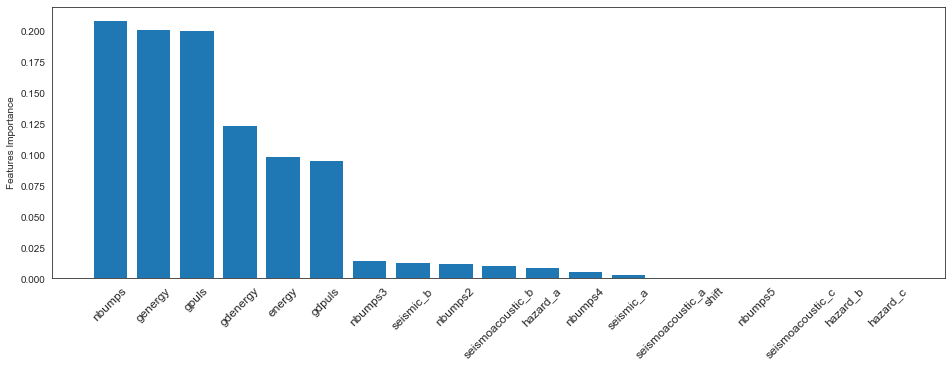

In [89]:
#tabella per report
dic={'nbumps': 0.20944427694090112,
 'genergy': 0.20151035450603264,
 'gpuls': 0.20093747616512955,
 'gdenergy': 0.12369731746312072,
 'energy': 0.09873887304071571,
 'gdpuls': 0.09560835202440734,
 'nbumps3': 0.015039302320469464,
 'seismic_b': 0.012929285068582068,
 'nbumps2': 0.012260187785654075,
 'seismoacoustic_b': 0.010772006395467514,
 'hazard_a': 0.009025528982683167,
 'nbumps4': 0.005570807023433885,
 'seismic_a': 0.003810361332677813,
 'seismoacoustic_a': 0.0006558709507248495,
 'shift': 5.969873439496145e-17,
 'nbumps5': 0.0,
 'seismoacoustic_c': 0.0,
 'hazard_b': 0.0,
 'hazard_c': 0.0}

plt.figure(figsize=(16, 5))
plt.bar(dic.keys() ,dic.values())
plt.xticks(rotation=45, size=12)
plt.ylabel('Features Importance')
plt.show()
